### Set up the SEIR model with births and deaths for the transmission dynamics of measles in a closed population using differential equations:
* Population 100000 people
* Pre-infectious period 8 days
* Infectious period 7 days
* Basic reproduction number 13
* Life Expectancy 70 years
* Initial values (S,E,I,R)=(99999,0,1,0)

Using the parameters above, plot a graph from the 40th year to the 50th year which illustrates your answer for each question.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd

In [2]:
# Setting up Differential Equation
N = 100000
pre_inf = 8
D = 7
R_0 = 13
life = 70*365

#initial value
S0 = 99999 ; E0 = 0 ; I0 = 1 ; R0 = 0

tspan = 150*365
dt = 1
t_stamp = np.arange(1,tspan,dt)
initial = np.array([S0,E0,I0,R0])

# variable
f = 1/pre_inf
gamma = 1/D
beta = R_0/(N*D)
death = 1/life
birth = N*death

In [3]:
def ODE_SEIR(y,t):
    yp = np.zeros((4))
    yp[0] = -beta*y[0]*y[2]+birth-death*y[0]
    yp[1] = beta*y[0]*y[2]-f*y[1]-death*y[1]
    yp[2] = f*y[1]-gamma*y[2]-death*y[2]
    yp[3] = gamma*y[2]-death*y[3]
    return yp

SEIR = spi.odeint(ODE_SEIR,initial,t_stamp)
S = SEIR[:,0];E = SEIR[:,1];I = SEIR[:,2];R = SEIR[:,3]

PropSus = S/N
PropImm = R/N
R_n = R_0*PropSus

New_preinf = beta*(S[0:-1]*I[0:-1]+S[1:]*I[1:])/2
New_inf = f*(E[0:-1]+E[1:])/2
Epi_thrs = 1/R_0
HerdImm = 1-1/R_0

#### 1. How does the net reproduction number change over time? What is the value of the net reproduction number when the daily number of new infectious peaks? What is its value when the daily number of new infectious persons reaches a trough?

Text(0.5, 1.0, 'Comparison between Rn and the daily number of new infectious')

<Figure size 576x288 with 0 Axes>

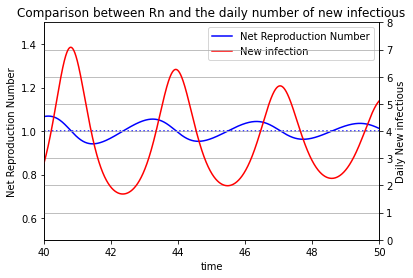

In [4]:
# visualize
plt.figure(figsize = (8,4))

fig, ax1 = plt.subplots()
ax1.set_xlabel('time')
ax1.set_ylabel('Net Reproduction Number')
ax1.set_ylim([0.5,1.5])
ax1.axhline(y=1, color='b',linestyle=':')
line1 = ax1.plot(t_stamp[0:-1]/365,R_n[0:-1],color = 'b',label = 'Net Reproduction Number')

ax2 = ax1.twinx()
ax2.set_ylabel('Daily New infectious')
line2 = ax2.plot(t_stamp[0:-1]/365, New_inf , color='r',label = 'New infection')
ax2.set_ylim([0,8])


plt.xlim([40,50])
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
plt.grid()
plt.title('Comparison between Rn and the daily number of new infectious')

#### 2. What is the trend in the daily number of new infectious when Rn<1, Rn>1, and Rn=1, respectively? 
Rn<1 일때 the daily number of new infectious가 증가하다가, R_n=1일때 peak를 찍고 ,Rn<1이면 다시 new infec이 감소하는 과정을 반복한다.

#### 3. What proportion of the population is susceptible to infection when the daily number of new infectious peaks or troughs? Is this consistent with what you expect and why?
When the daily number of new infectious peaks, I think that the proportion of Susceptible is 1/ (=0.0769). This is consistent with what I expect.

#### 4. Calculate the herd immunity threshold in this population.

In [5]:
print("When Rn = 1 the daily number of Susceptible = %.6f " %Epi_thrs)
print("Herd immunity threshold = %.6f" %HerdImm)

When Rn = 1 the daily number of Susceptible = 0.076923 
Herd immunity threshold = 0.923077


#### 5. What is the value of proportion of immune when the number of new infectious per day peaks or troughs? What do you notice about the value of proportion of immune when the daily number of new infectious is declining? What is its value when the daily number of new infectious is increasing? How does this relate to your estimate of the herd immunity threshold?

Text(0.5, 1.0, 'Comparison between Immprop and the daily number of new infectious')

<Figure size 576x288 with 0 Axes>

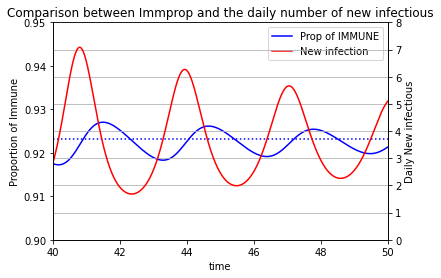

In [6]:
# visualize
plt.figure(figsize = (8,4))

fig, ax1 = plt.subplots()
ax1.set_xlabel('time')
ax1.set_ylabel('Proportion of Immune')
ax1.set_ylim([0.9,0.95])
ax1.axhline(y=HerdImm, color='b',linestyle=':')
line1 = ax1.plot(t_stamp[0:-1]/365,PropImm[0:-1],color = 'b',label = 'Prop of IMMUNE')

ax2 = ax1.twinx()
ax2.set_ylabel('Daily New infectious')
line2 = ax2.plot(t_stamp[0:-1]/365, New_inf , color='r',label = 'New infection')
ax2.set_ylim([0,8])


plt.xlim([40,50])
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
plt.grid()
plt.title('Comparison between Immprop and the daily number of new infectious')

### PART 2 : Vaccination
Modify the model to include the vaccination which is introduced 50 years after the infection has been circulating in the population so that a proportion of newborn individuals are effectively vaccinated. Run the model for 80 years and plot the proportion of immune and the number of new infectious on each side of y-axis.

In [7]:
# Setting up Differential Equation
N = 100000
pre_inf = 8
D = 7
R_0 = 13
life = 70*365

#initial value
S0 = 99999 ; E0 = 0 ; I0 = 1 ; R0 = 0

tspan = 150*365
dt = 1
t_stamp = np.arange(1,tspan,dt)
initial = np.array([S0,E0,I0,R0])

# variable
f = 1/pre_inf
gamma = 1/D
beta = R_0/(N*D)
death = 1/life
birth = N*death

In [8]:
# Vaccine
vacc_val = np.array([0,60,90,93])
n = vacc_val.size

def vac(cov,t):
    if t>50*365+1:
        y = cov/100
    else:
        y = 0
    return y

In [9]:
# Allocate memories
S = np.zeros([tspan-1,n])
E = np.zeros([tspan-1,n])
I = np.zeros([tspan-1,n])
R = np.zeros([tspan-1,n])
propsus = np.zeros([tspan-1,n])
propimm = np.zeros([tspan-1,n])
R_n = np.zeros([tspan-1,n])
New_preinf = np.zeros([tspan-2,n])
New_inf = np.zeros([tspan-2,n])


for i in range(n):
    def ODE_SEIR(y,t):
        yp = np.zeros((4))
        yp[0] = -beta*y[0]*y[2]+(1-vac(vacc_val[i],t))*birth-death*y[0]
        yp[1] = beta*y[0]*y[2]-f*y[1]-death*y[1]
        yp[2] = f*y[1]-gamma*y[2]-death*y[2]
        yp[3] = gamma*y[2]-death*y[3]+vac(vacc_val[i],t)*birth
        return yp

    SEIR = spi.odeint(ODE_SEIR,initial,t_stamp)
    S[:,i] = SEIR[:,0]
    E[:,i] = SEIR[:,1]
    I[:,i] = SEIR[:,2]
    R[:,i] = SEIR[:,3]

    New_preinf[:,i] = beta*(S[0:-1,i]*I[0:-1,i]+S[1:,i]*I[1:,i])/2
    New_inf[:,i] = f*(E[0:-1,i]+E[1:,i])/2

Text(0.5, 1.0, 'The long-term daily number of new infectious')

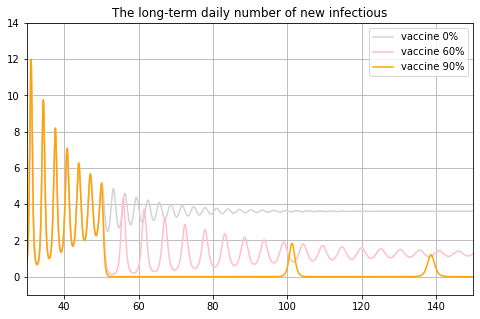

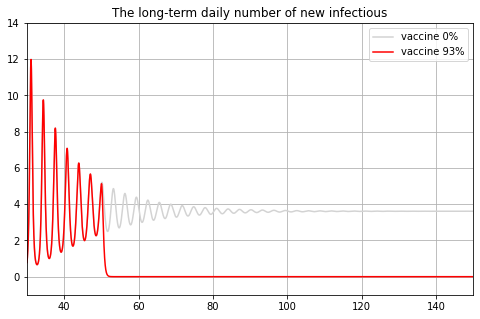

In [10]:
# visualize
plt.figure(figsize = (8,5))
plt.plot(t_stamp[0:-1]/365,New_inf[:,0],'lightgray',label = 'vaccine 0%')
plt.plot(t_stamp[0:-1]/365,New_inf[:,1],'pink',label = 'vaccine 60%')
plt.plot(t_stamp[0:-1]/365,New_inf[:,2],'orange',label = 'vaccine 90%')
plt.xlim([30,150])
plt.ylim([-1,14])
plt.legend()
plt.grid()
plt.title('The long-term daily number of new infectious')

plt.figure(figsize = (8,5))
plt.plot(t_stamp[0:-1]/365,New_inf[:,0],'lightgray',label = 'vaccine 0%')
plt.plot(t_stamp[0:-1]/365,New_inf[:,3],'red',label = 'vaccine 93%')
plt.xlim([30,150])
plt.ylim([-1,14])
plt.legend()
plt.grid()
plt.title('The long-term daily number of new infectious')